# NLP with Disaster Tweets using LSTM

## IMPORTING LIBRARIES

---



In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text
import string
import re

#Library for nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

# the WordNet dataset (needed for lemmatization)
nltk.download('wordnet')

#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

import itertools
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## DATA

---



In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DATASET/DISTWEET_TRAIN.csv')
test_data = pd.read_csv('/content/drive/MyDrive/DATASET/DISTWEET TEST.csv')

In [ ]:
train_data.sample(10).style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
1312,1895,burning,NY,The Burning Legion has RETURNED! https://t.co/hKsbmijqZ1,0
3450,4934,exploded,USA,If you told me ten years ago that I'd be seeing anime on the big screen... ...I probably would have exploded,0
4803,6835,loud%20bang,{Detailed},@ToxicSavior_ -a loud bang. He froze on the spot as slowly every head turned towards him. One of the things he hated the most was to be -,0
5374,7670,panic,"Palm Bay, FL (Kissimmee)",Panic over: Patient in Alabama tests negative for Ebola http://t.co/cY0CiU2u1C,1
542,788,avalanche,Freeport il,The possible new jerseys for the Avalanche next year. ???? http://t.co/nruzhR5XQu,0
4631,6582,injury,nan,incident with injury:I-495 inner loop Exit 31 - MD 97/Georgia Ave Silver Spring,1
4556,6477,injured,nan,Udhampur terror attack: Militants attack police post 2 SPOs injured: Suspected militants tonight attacked a p... http://t.co/cEKbxJmPBj,1
6804,9749,tragedy,MÌ©xico,I'm gunning down romance It never did a thing for me But heartache and misery Ain't nothing but a tragedy http://t.co/jhUPOgbvs8,0
2728,3919,devastated,Indonesia,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/a1MoeJxqyA,1
3504,5007,explosion,nan,The insides of the explosion box.. Get it customized the way you want! #dcubecrafts #greetingcardsÛ_ https://t.co/T07qxP5cBE,0


## DATA INFORMATION

---



In [ ]:
print(train_data.shape)
print(test_data.shape)

(7613, 5)
(3263, 4)


## DATA CLEANING

---



### Removing Punctuations

We can create a function 'toclean_text' to remove punctuations, and then it can used to clean text column of training data.

In [ ]:
def toclean_text(text):


    clean_text = [char for char in text if char not in string.punctuation]

    clean_text = ''.join(clean_text)


    return clean_text

This function takes an input string text, iterates through each character, removes punctuation characters using list comprehension, and then joins the characters back into a single string. The cleaned text is returned by the function.

Function 'toclean_text', will remove punctuations in a text. Now we apply it to training data and create a column clean_text for the training data, which will have text without puntuations.

In [ ]:
train_data['clean_text'] = train_data['text'].apply(toclean_text)

### Removing Noise

Noise in a text can be considered as anything which does belong to normal human language interaction.

Noise in the text can generally be considered as URL, abbreviations, emojis, message inside HTML tag, etc. Punctuations can also be considered as noise. But here we have already removed punctuations.

The main reason why abbreviations are included as noise is that some people write thx for thankyou. If abbreviations are not replaced with the original word, 'thx' and 'thankyou' will be considered as two different words.

In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

`re`: Regular expressions are sequences of characters defining a search pattern to match, find, or replace text based on specific rules.

In [ ]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

the `u` prefix before a string literal indicates that the string should be treated as a Unicode string. Unicode is a standard for representing text characters from various writing systems around the world.

In [ ]:
def clean_tweet(text):

    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)

    # replace abbreviations, @ and number
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)

    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)

    return text

Function clean_tweet() will remove all the noise in the text.

In [ ]:
train_data["clean_text"] = train_data["clean_text"].apply(clean_tweet)

### Removing Stopwords

Stopwords are commonly used words, which do not have any distinguishing features, like "a", "an", "the", so on… and search engine is programmed to ignore them while indexing entries and while retrieving the results of a search query. It saves space in the database and decreases processing speed.

Natural Language Toolkit(nlkt) in python has a list of stopwords stored in 16 different languages. It is a leading platform for building a python program to work with human language data.

In [ ]:
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

In [ ]:
train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)

### Lowercasing

Lowercasing is a preprocessing method in which the text is converted into the lower case. In tokenization, Keras tokenizer is used, which will be converting texts to lowercase.

So here there is no need for lowercasing the texts as it will be a duplicate work.

### Tokenization

Tokenization generally decomposes text documents into small tokens and constructs a document word matrix. A document can be considered as a bag of words. Collection of document is called Corpus.

In document word matrix :

* Each Row represents a document (bag of words)
* Each column distinct token
* Each cell represents the frequency of occurrence of the token

Here Keras Tokenizer() is used which is supported by Tensorflow as a high-level API that encodes the token to a numerical value. The main reason to use this is in LSTM input is provided by embedding layer, which requires input data to be integer encoded.

Parameter 'num_words' can be used to restrict the number of the token to considered by the model.

Tokenizer() uses fit_on_texts() and texts_to_sequences() to encode the texts to numerical values.

1. Fit_on_texts() Updates internal vocabulary based on a list of texts. It will create a dictionary with word mapping with an index (unique numerical value). Here all the words will be in lower case and the least value of index will be the more frequent word.

2. texts_to_sequences() Transforms each text in texts to a sequence of numerical value. It will give assign the index of each to the word. So the output will be series of numerical values.

In [ ]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X)

We are not be having the same length for all the sentences and while providing input to neural networks, we should have the same dimension for all inputs. So pad_sequence() is used to pad the input so that all the inputs have the same dimension. It will add zeros to the input, in the beginning, to make sure all the inputs have the same dimension.

In [ ]:
X.shape

(7613, 20)

Here size of tokenized vector is 20, it is the maximum length of clean_text considering excluding those tokens which does not belong to top 3000 tokens. That is if the maximum length of clean_text is 35, then the 15 token will not be qualified to come under top 3000 tokens.

We can restrict on enhance dimension of tokenized vector by providing a parameter maxlen to pad_sequence().

In [ ]:
train_data.head(5)

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[NUMBER, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


## EXPLORATORY DATA ANALYSIS

---



### Target Distribution

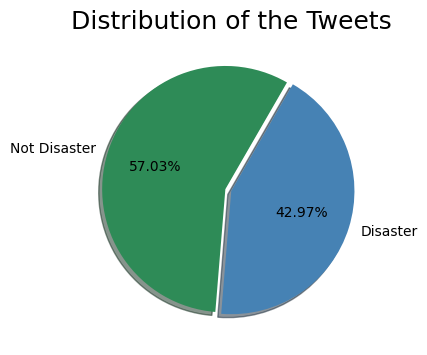

In [ ]:
fig= plt.subplots(figsize=(10, 4), dpi=100)
colors = ['seagreen', 'steelblue']
plt.pie(train_data['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60,
        colors=colors)
plt.title('Distribution of the Tweets', fontsize=18)
plt.show()

Upon examining the distribution of our target variables, we observe that they are fairly balanced. The disparities between the classes are not substantial, which is indicative of a favorable scenario for modeling.

### Most Common Words

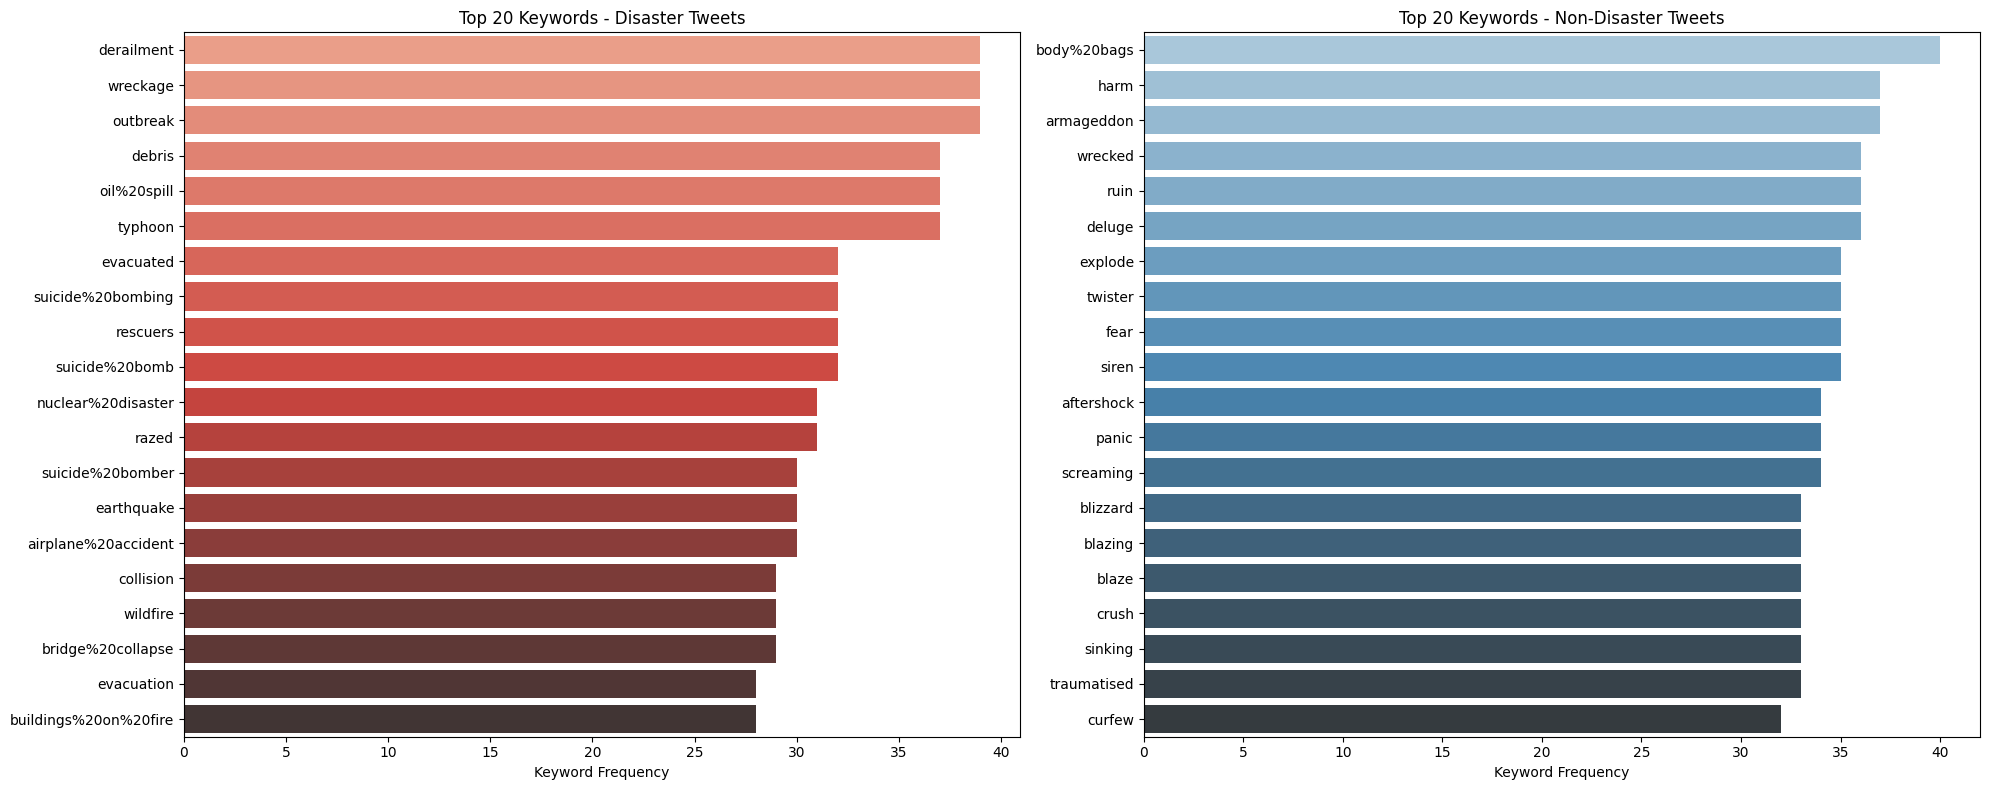

In [ ]:
disaster_keywords = train_data.loc[train_data["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train_data.loc[train_data["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")


plt.tight_layout()
plt.show()

### Plotting tweets length

In [ ]:
train_data["length"]  = train_data["text"].apply(len)


We can create a column length in train_data, which will have length of each text.

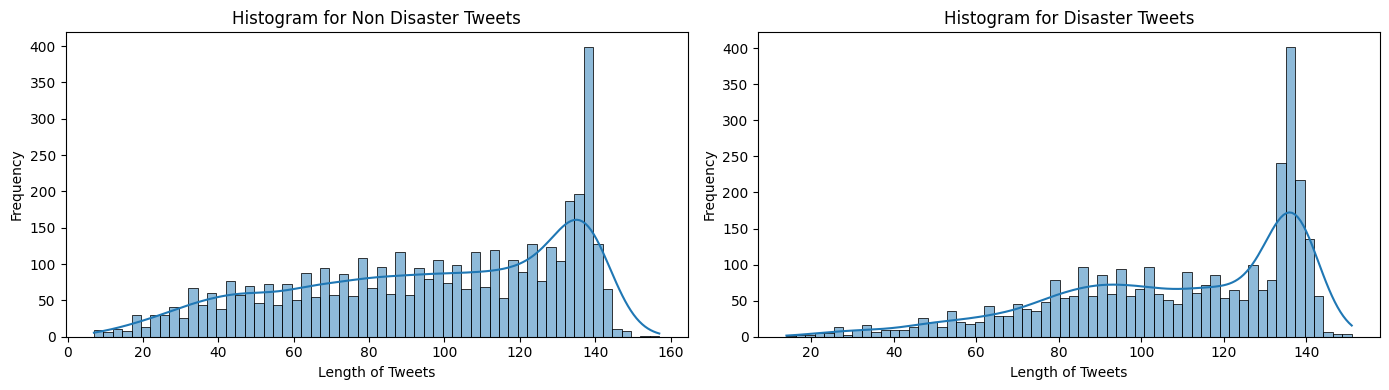

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram for Non Disaster Tweets
sns.histplot(train_data[train_data['target'] == 0]['length'], bins=60, kde=True, ax=axes[0])
axes[0].set_xlabel('Length of Tweets')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram for Non Disaster Tweets')

# Histogram for Disaster Tweets
sns.histplot(train_data[train_data['target'] == 1]['length'], bins=60, kde=True, ax=axes[1])
axes[1].set_xlabel('Length of Tweets')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Disaster Tweets')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Model creation Using LSTM

---



### Splitting Text data

In [ ]:
y = train_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)

Embedding Layer

Embedding layer is the first layer of neural network and it has 3 parameters:

* input_dim: Number of distinct token vector, here it will be 3000 (max_features)
* output_dim: Dimension of embedding vector, we can take 32 dimension
* input_length: Size of input layer
Here embedding layer of size will be (3000, 32).

In [ ]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 dropout_5 (Dropout)         (None, 50, 32)            0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 168353 (657.63 KB)
Trainable params: 168353 (657.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 14s 44ms/step - loss: 0.5447 - accuracy: 0.7220 - val_loss: 0.4304 - val_accuracy: 0.8142
Epoch 2/10
191/191 [==============================] - 6s 31ms/step - loss: 0.3777 - accuracy: 0.8429 - val_loss: 0.4494 - val_accuracy: 0.8122
Epoch 3/10
191/191 [==============================] - 8s 42ms/step - loss: 0.3227 - accuracy: 0.8657 - val_loss: 0.4614 - val_accuracy: 0.7945
Epoch 4/10
191/191 [==============================] - 6s 31ms/step - loss: 0.2894 - accuracy: 0.8867 - val_loss: 0.5095 - val_accuracy: 0.7886
Epoch 5/10
191/191 [==============================] - 8s 41ms/step - loss: 0.2613 - accuracy: 0.8916 - val_loss: 0.5508 - val_accuracy: 0.7879
Epoch 6/10
191/191 [==============================] - 6s 30ms/step - loss: 0.2284 - accuracy: 0.9048 - val_loss: 0.7075 - val_accuracy: 0.7735
Epoch 7/10
191/191 [==============================] - 8s 40ms/step - loss: 0.2049 - accuracy: 0.9144 - val_loss: 0.6589 - val_accuracy: 0.768

### Evaluation

In [ ]:
train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
train_accuracy

191/191 [==============================] - 3s 7ms/step


96

In [ ]:
y_pred = model.predict(X_test).round()

48/48 [==============================] - 0s 9ms/step


In [ ]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision  is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy  is  :  0.7550886408404465
Recall  is    :  0.7332317073170732
Precision  is :  0.7083946980854198


### Confusion Matrix

---



In [ ]:
conm = confusion_matrix(y_test,y_pred)
conm

array([[669, 198],
       [175, 481]])

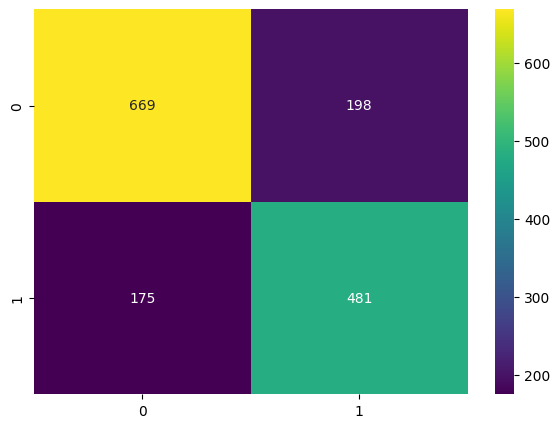

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='viridis')
plt.show()

### Classification Report

---



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       867
           1       0.71      0.73      0.72       656

    accuracy                           0.76      1523
   macro avg       0.75      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523



s Accuracy, Precision, recall and F1 score are above 70 % this model can be considered as good model.

By changing dimension on Embedding Layer, max_features, LSTM can check if the evalution factors are improving or not.



## Prediction

---



In [ ]:
test_data['clean_text'] = test_data['text'].apply(toclean_text)
test_data["clean_text"] = test_data["clean_text"].apply(clean_tweet)

In [ ]:
test_token = tokenizer.texts_to_sequences(test_data['clean_text'].values)
test_token = pad_sequences(test_token, maxlen =l)

### Creating New Model for Prediction with

In [136]:
l =50
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X, maxlen =l)
tokenizer.fit_on_texts(train_data['clean_text'].values)
test_token = tokenizer.texts_to_sequences(test_data['clean_text'].values)
test_token = pad_sequences(test_token, maxlen =l)
embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           500000    
                                                                 
 dropout_6 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 100)           80400     
                                                                 
 dropout_7 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [137]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(X,y, epochs = 10,validation_split = 0.2 ,callbacks=[es_callback], batch_size=32)

Epoch 1/10
191/191 [==============================] - 73s 308ms/step - loss: 0.5255 - accuracy: 0.7471 - val_loss: 0.4482 - val_accuracy: 0.7925
Epoch 2/10
191/191 [==============================] - 55s 290ms/step - loss: 0.3515 - accuracy: 0.8522 - val_loss: 0.4735 - val_accuracy: 0.7820
Epoch 3/10
191/191 [==============================] - 63s 328ms/step - loss: 0.2852 - accuracy: 0.8862 - val_loss: 0.5635 - val_accuracy: 0.7571
Epoch 4/10
191/191 [==============================] - 56s 295ms/step - loss: 0.2328 - accuracy: 0.9108 - val_loss: 0.5583 - val_accuracy: 0.7564


In [141]:
y_hat = model.predict(test_token).round()
submission = pd.read_csv("/content/drive/MyDrive/DATASET/DISTWEET SAMPLE.csv")
submission['target'] = np.round(y_hat).astype('int')

102/102 [==============================] - 6s 56ms/step


In [142]:
submission.head(10).style.background_gradient(cmap='coolwarm')

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


<Axes: >

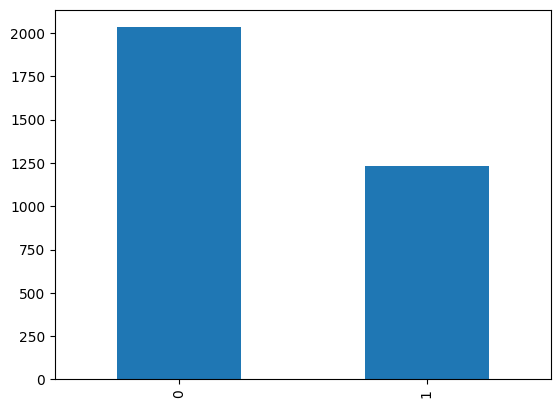

In [139]:
submission.target.value_counts().plot.bar()